In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
dfinf = pd.read_csv('WorldInflation.csv')

In [143]:
dfdata = dfinf.T.iloc[4:-1,:]

In [144]:
scols = dfinf.T.iloc[:1].T.iloc[0:]


In [145]:
dfdata.columns = [c[0] for c in scols.values]


In [147]:
dtidx = pd.DatetimeIndex([pd.datetime(int(d),1,1) for d in dfdata.reset_index()['index'].values])
dfdata.index = dtidx

In [148]:
dfdata.to_csv('WorldInflationDF.csv')

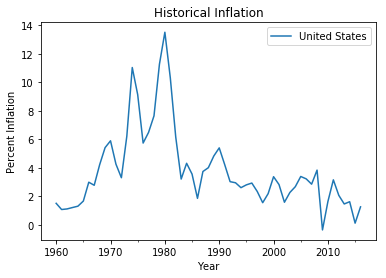

In [158]:
ax = dfdata[['United States']].plot()
plt.xlabel('Year')
plt.ylabel('Percent Inflation')
plt.title('Historical Inflation');

In [151]:
# Get the average inflation for each country
dfpivot = dfdata.T.mean(axis=1)


In [153]:
dfavginf = pd.DataFrame({
    'Country' : dfpivot.index,
    'Avg Inflation' : dfpivot.values
})
dfavginf.head(3)

,Avg Inflation,Country
0,3.021732,Aruba
1,6.825219,Afghanistan
2,423.257519,Angola


In [154]:
dfavginf.set_index('Country',inplace=True)

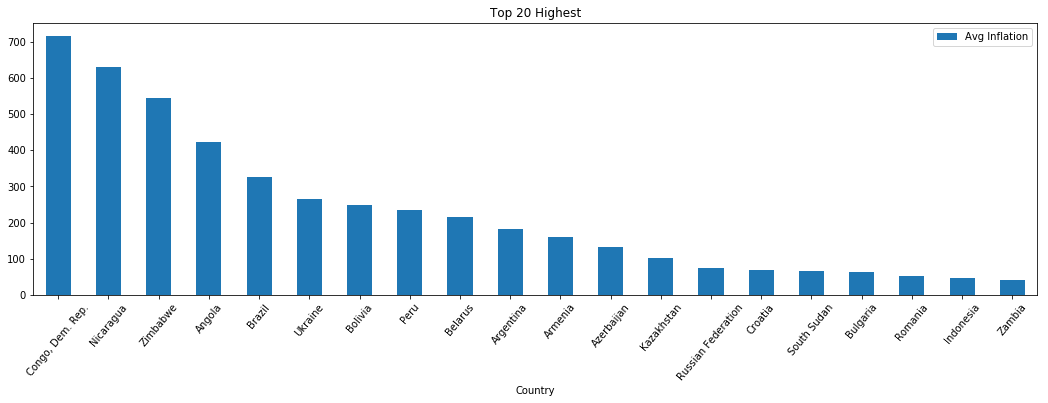

In [155]:
dfavginf.sort_values('Avg Inflation',ascending=False).dropna().iloc[:20].plot(kind='bar',figsize=(18,5))
plt.xticks(rotation=50)
plt.title('Top 20 Highest');

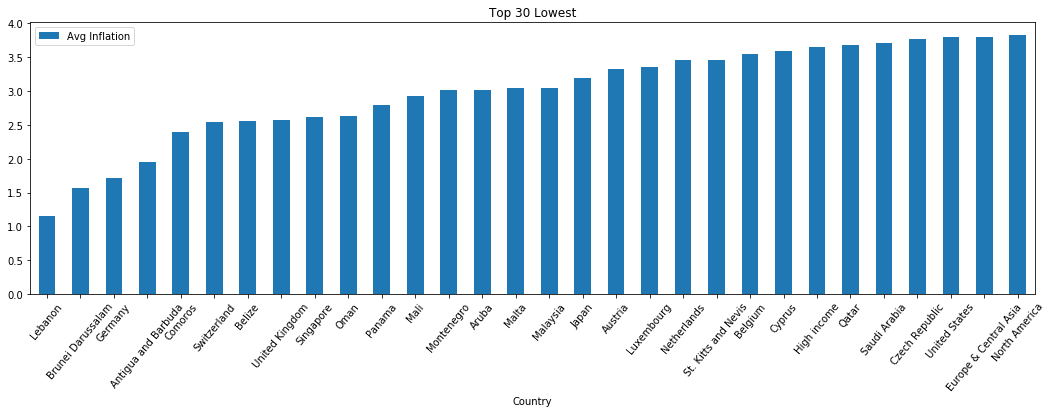

In [156]:
dfavginf.sort_values('Avg Inflation',ascending=True).dropna().iloc[:30].plot(kind='bar',figsize=(18,5))
plt.xticks(rotation=50)
plt.title('Top 30 Lowest');